In [39]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/dataset-lungs

negative  positive


In [ ]:
import os, shutil

original_dataset_dir = '/content/drive/MyDrive/dataset-lungs'
base_dir = '/content/drive/MyDrive/base_data'
os.mkdir(base_dir)

In [ ]:
base_dir

'/content/drive/MyDrive/base_data'

In [ ]:
# Making Training and testing folders in data folder
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# Making positive and negative folders in both train and test folders
train_positive_dir = os.path.join(train_dir, 'positive')
os.mkdir(train_positive_dir)

train_negative_dir = os.path.join(train_dir, 'negative')
os.mkdir(train_negative_dir)

test_positive_dir = os.path.join(test_dir, 'positive')
os.mkdir(test_positive_dir)

test_negative_dir = os.path.join(test_dir, 'negative')
os.mkdir(test_negative_dir)

In [ ]:
# Copying the first 176 pictures(75%) from postive folders and taking them to postive folder in training one.
fnames = [f'positive{i}.jpeg' for i in range(1,176)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/dataset-lungs/positive', fname)
    dst = os.path.join(train_positive_dir, fname)
    shutil.copyfile(src, dst)



In [ ]:
# Copying the first 125 pictures(75%) from negative folders and taking them to negative folder in training one.
fnames = [f'negative{i}.jpeg' for i in range(1,226)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/dataset-lungs/negative', fname)
    dst = os.path.join(train_negative_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copying the last 59 pictures(25%) from positive folder and taking them to positive folder in testing one.
fnames = [f'positive{i}.jpeg' for i in range(176,235)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/dataset-lungs/positive', fname)
    dst = os.path.join(test_positive_dir, fname)
    shutil.copyfile(src, dst)

# Copying the last 75 negative (25%) from negative folder and taking them to negative folder in testing one.
fnames = [f'negative{i}.jpeg' for i in range(226,301)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/dataset-lungs/negative', fname)
    dst = os.path.join(test_negative_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Creating the model architecture
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Model compilation
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.001),metrics=['acc'])

In [ ]:
# Rescaling
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 400 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=7,)

Epoch 1/7
20/20 [==============================] - 30s 1s/step - loss: 0.7116 - acc: 0.5575
Epoch 2/7
20/20 [==============================] - 24s 1s/step - loss: 0.6726 - acc: 0.5625
Epoch 3/7
20/20 [==============================] - 23s 1s/step - loss: 0.6548 - acc: 0.6775
Epoch 4/7
20/20 [==============================] - 24s 1s/step - loss: 0.6177 - acc: 0.7225
Epoch 5/7
20/20 [==============================] - 25s 1s/step - loss: 0.4358 - acc: 0.8175
Epoch 6/7
20/20 [==============================] - 22s 1s/step - loss: 0.4987 - acc: 0.8450
Epoch 7/7
20/20 [==============================] - 24s 1s/step - loss: 0.3100 - acc: 0.8825


In [ ]:
# Test data prediction
y_pred = model.predict(test_generator)

7/7 [==============================] - 4s 522ms/step


In [ ]:
y_pred

array([[4.88578109e-03],
       [1.56143727e-02],
       [6.89317510e-02],
       [9.50932384e-01],
       [1.54834576e-02],
       [5.87125897e-01],
       [8.87565315e-01],
       [9.31798756e-01],
       [6.70555174e-01],
       [7.85568416e-01],
       [1.59091741e-01],
       [9.60623443e-01],
       [9.67959642e-01],
       [3.12774931e-03],
       [8.83174777e-01],
       [8.64537776e-01],
       [2.29178503e-01],
       [4.36198041e-02],
       [1.50682449e-01],
       [1.15203775e-01],
       [1.55745149e-01],
       [8.24263990e-01],
       [9.00090098e-01],
       [9.82533872e-01],
       [2.90836692e-01],
       [8.51593256e-01],
       [4.99518923e-02],
       [8.89403895e-02],
       [9.99870062e-01],
       [1.01084635e-01],
       [5.17090857e-01],
       [1.62338130e-02],
       [2.68733762e-02],
       [8.67514238e-02],
       [4.93566364e-01],
       [7.34169483e-01],
       [9.65163529e-01],
       [2.04824194e-01],
       [7.16701299e-02],
       [7.95788765e-01],


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
# Confusion matrix and classificatino report
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cf = confusion_matrix(test_generator.classes, y_pred)

In [ ]:
cf

array([[75,  0],
       [59,  0]])

<Axes: >

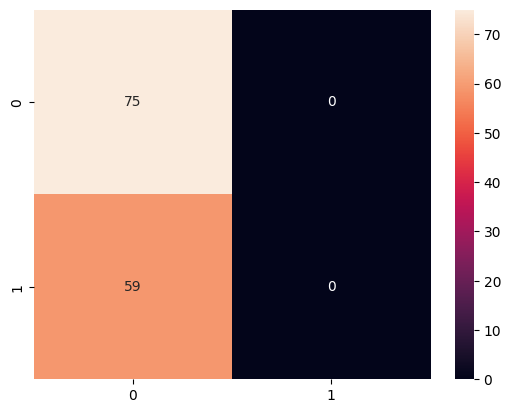

In [ ]:
import seaborn as sns
sns.heatmap(cf, fmt ='g', annot= True)